In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [72]:
cost_of_living_df = pd.read_csv("D:\Programming_Projects\ML_City_Pollution\movehubcostofliving.csv")
print(cost_of_living_df.head())

       City  Cappuccino  Cinema   Wine  Gasoline  Avg Rent  \
0  Lausanne        3.15   12.59   8.40      1.32   1714.00   
1    Zurich        3.28   12.59   8.40      1.31   2378.61   
2    Geneva        2.80   12.94  10.49      1.28   2607.95   
3     Basel        3.50   11.89   7.35      1.25   1649.29   
4     Perth        2.87   11.43  10.08      0.97   2083.14   

   Avg Disposable Income  
0                4266.11  
1                4197.55  
2                3917.72  
3                3847.76  
4                3358.55  


In [73]:
quality_of_life_df = pd.read_csv("D:\Programming_Projects\ML_City_Pollution\movehubqualityoflife.csv")
print(quality_of_life_df.head())
len(quality_of_life_df)

           City  Movehub Rating  Purchase Power  Health Care  Pollution  \
0       Caracas           65.18           11.25        44.44      83.45   
1  Johannesburg           84.08           53.99        59.98      47.39   
2     Fortaleza           80.17           52.28        45.46      66.32   
3   Saint Louis           85.25           80.40        77.29      31.33   
4   Mexico City           75.07           24.28        61.76      18.95   

   Quality of Life  Crime Rating  
0             8.61         85.70  
1            51.26         83.93  
2            36.68         78.65  
3            87.51         78.13  
4            27.91         77.86  


216

In [74]:
df = pd.concat([quality_of_life_df.set_index("City"), cost_of_living_df.set_index("City")], axis=1)
df.head()

,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
City,,,,,,,,,,,,
Caracas,65.18,11.25,44.44,83.45,8.61,85.70,1.80,9.12,11.97,0.07,1634.42,527.89
Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93,1.16,3.46,3.53,0.84,705.63,1167.89
Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65,1.46,5.20,5.85,0.88,650.26,1307.54
Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13,1.96,6.54,6.54,0.61,980.65,2144.36
Mexico City,75.07,24.28,61.76,18.95,27.91,77.86,1.60,3.20,7.47,0.56,747.10,587.01


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, Caracas to Malaga
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Movehub Rating         216 non-null    float64
 1   Purchase Power         216 non-null    float64
 2   Health Care            216 non-null    float64
 3   Pollution              216 non-null    float64
 4   Quality of Life        216 non-null    float64
 5   Crime Rating           216 non-null    float64
 6   Cappuccino             216 non-null    float64
 7   Cinema                 216 non-null    float64
 8   Wine                   216 non-null    float64
 9   Gasoline               216 non-null    float64
 10  Avg Rent               216 non-null    float64
 11  Avg Disposable Income  216 non-null    float64
dtypes: float64(12)
memory usage: 21.1+ KB


<AxesSubplot:>

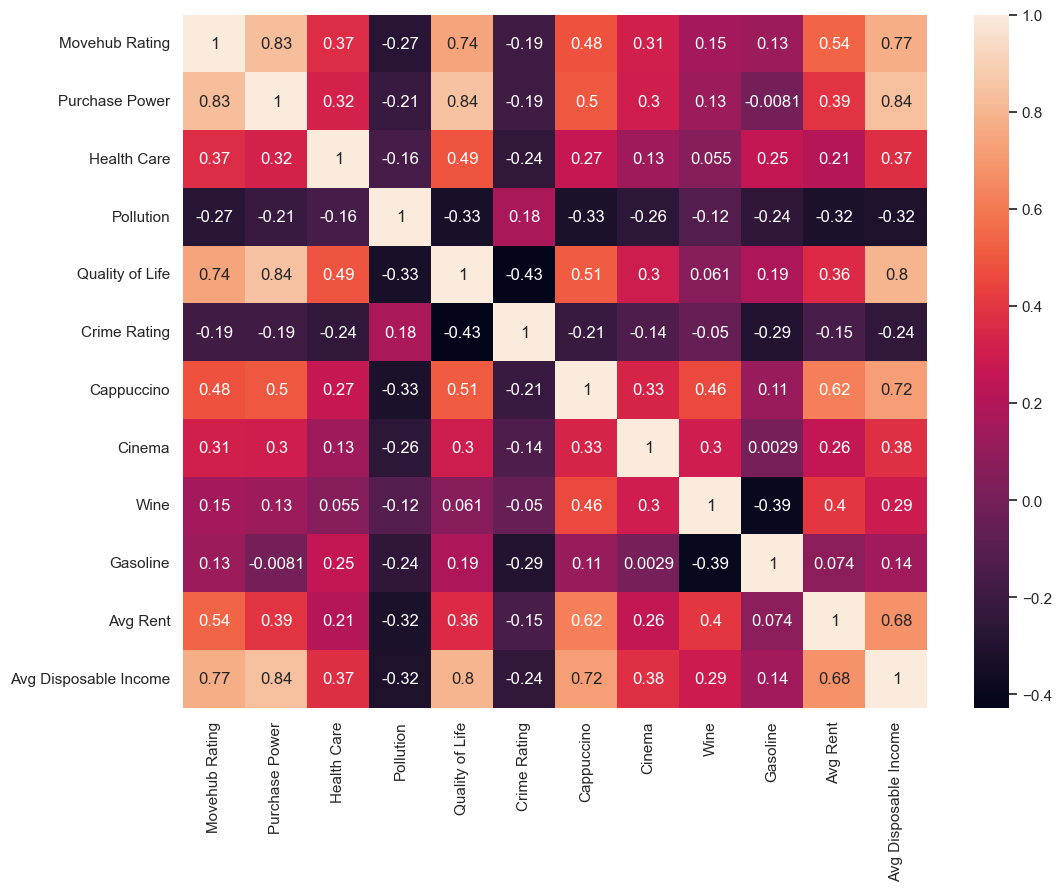

In [76]:
correlation_mtrx = df.corr()
sns.set(rc={'figure.figsize': (12, 9)})
sns.heatmap(correlation_mtrx, annot=True)

In [77]:
def model_test_random_state(model, random_state):
    y = df.Pollution
    X = df.loc[:, df.columns != "Pollution"]
    mae = []
    mse = []
    train_score = []
    test_score = []

    for i in range(random_state):
        X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                              random_state=i)
        model.fit(X_train, y_train)
        predicts = model.predict(X_valid)
        mmae = mean_absolute_error(y_valid, predicts)
        mmse = mean_squared_error(y_valid, predicts)
        train_scr = model.score(X_train, y_train)
        test_scr = model.score(X_valid, y_valid)
        mae.append(mmae)
        mse.append(mmse)
        train_score.append(train_scr)
        test_score.append(test_scr)
    d = {"MAE": mae, "MSE": mse, "Train score": train_score, "Test score": test_score}
    random_state_result = pd.DataFrame(data=d)
    return random_state_result


LR_model = LinearRegression()
LR_df=model_test_random_state(LR_model, 100)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(LR_df)

ridge_model = Ridge(alpha=100, fit_intercept=True)
ridge_df = model_test_random_state(ridge_model, 100)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(ridge_df)

          MAE          MSE  Train score  Test score
0   22.434584   693.486489     0.250850   -0.008041
1   21.791406   627.519749     0.285080    0.007082
2   18.446712   475.004677     0.224748    0.316243
3   20.665671   636.415189     0.295218    0.007447
4   23.550085   745.472227     0.309767   -0.124880
5   18.403249   492.742023     0.242251    0.247153
6   21.313588   668.675291     0.268908    0.135546
7   16.019857   351.705112     0.240670    0.277821
8   18.080189   438.304036     0.243746    0.228556
9   19.261887   493.159900     0.242725    0.254709
10  19.918784   524.362927     0.238534    0.270506
11  20.522312   651.212550     0.237206    0.148152
12  17.759336   465.245235     0.246088    0.245818
13  18.536749   492.240012     0.238792    0.272851
14  20.587919   545.131949     0.248412    0.249245
15  19.310701   498.049881     0.268850    0.158630
16  20.140870   533.135148     0.230606    0.290956
17  18.510791   487.375779     0.258250    0.206055
18  21.11179

MAE             19.946663
MSE            585.838097
Train score      0.232577
Test score       0.074486
dtype: float64
MAE             19.142463
MSE            520.324109
Train score      0.222311
Test score       0.179417
dtype: float64


<AxesSubplot:>

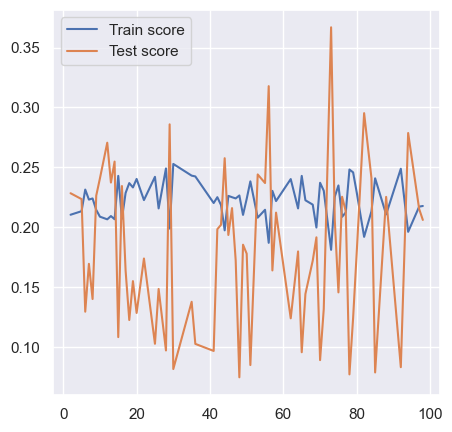

In [78]:
sns.set(rc={'figure.figsize': (5, 5)})
print(ridge_df.mean())
test_score_mean_ridge = ridge_df["Test score"].mean()
ridge_df = ridge_df.drop(ridge_df[ridge_df["Test score"] < test_score_mean_ridge].index)
print(ridge_df.mean())

ridge_df.loc[:, ["Train score", "Test score"]].plot()

MAE             19.545285
MSE            561.029511
Train score      0.262987
Test score       0.114426
dtype: float64
MAE             18.692559
MSE            497.598835
Train score      0.249190
Test score       0.217343
dtype: float64


<AxesSubplot:>

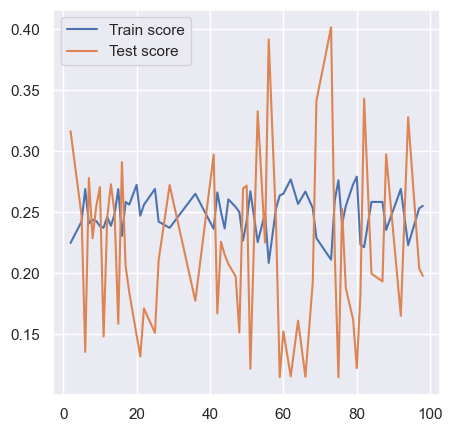

In [79]:

print(LR_df.mean())

test_score_mean_LR = LR_df["Test score"].mean()
LR_df = LR_df.drop(LR_df[LR_df["Test score"] < test_score_mean_LR].index)
print(LR_df.mean())

LR_df.loc[:, ["Train score", "Test score"]].plot()

In [79]:
sns.set(rc={'figure.figsize': (5, 5)})
print(ridge_df.mean())
ridge_df.loc[:, ["Train score", "Test score"]].plot()

MAE             19.527330
MSE            543.428825
Train score      0.256271
Test score       0.159841
dtype: float64


<AxesSubplot:>

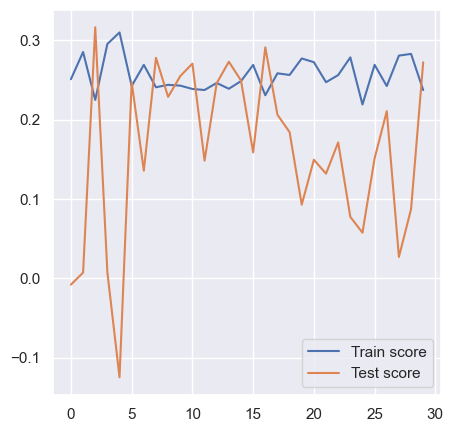

In [69]:

print(LR_df.mean())

LR_df.loc[:, ["Train score", "Test score"]].plot()